In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
## Imports...
# Math
from random import randint

# For deep learning algo
from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical

# For machine learning algo
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("../input/digit-recognizer/train.csv")
test_data = pd.read_csv("../input/digit-recognizer/test.csv")

print("Train_data shape: ", train_data.shape)
print("Test_data shape:", test_data.shape)
print("\n")

print("Train data:")
train_data.head()

Train_data shape:  (42000, 785)
Test_data shape: (28000, 784)


Train data:


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Visualize the set of single labels. Are all labels represented? If so, ais their distribution rather uniform?
set(train_data["label"])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

<AxesSubplot:xlabel='label', ylabel='count'>

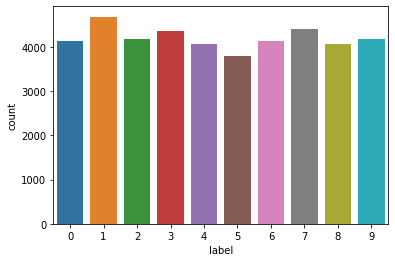

In [ ]:
# Visualize the distribuation of labels
sns.countplot(x=train_data["label"])

In [ ]:
def plot_digit(pixels, label):
    digit = pixels.to_numpy().reshape((28,28))
    plt.title("Label: {}".format(label))  
    fig = plt.imshow(digit,cmap="gist_gray")

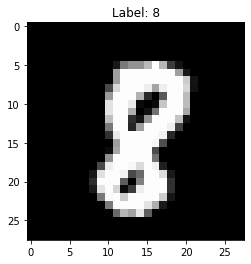

In [ ]:
random_num = randint(0, train_data.shape[0] - 1)
pixels = train_data.iloc[random_num,1:]
label = train_data.iloc[random_num,0]

plot_digit(pixels, label)

In [ ]:
d_y = train_data["label"].to_numpy()
d_x = train_data.drop(columns = "label").to_numpy()
d_x = np.reshape(d_x, (d_x.shape[0], 28, 28, 1))

x_test = test_data.to_numpy()
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

d_x = d_x.astype('float32')
x_test = x_test.astype('float32')

d_x/=255
x_test/=255

#print(train_data.iloc[0])
print("Shape of d_x: ", d_x.shape)
print("Shape of d_y: ", d_y.shape)
#print(x_train[0].shape)

Shape of d_x:  (42000, 28, 28, 1)
Shape of d_y:  (42000,)


In [ ]:
# set number of categories
num_category = 10
# convert class vectors to binary class matrices
d_y = to_categorical(d_y, num_category)
print('Shape of y_train: ', d_y.shape)

Shape of y_train:  (42000, 10)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(d_x, d_y, test_size=0.2, random_state=0)

print('Shape of y_train: ', y_train.shape)

Shape of y_train:  (33600, 10)


In [ ]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
#model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2,2)))
cnn_model.add(layers.Conv2D(64, (5,5), activation='relu'))
#model.add(layers.BatchNormalization(-1)) does not work :( we will look at it a later submission
#cnn_model.add(layers.Dropout(0.25))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.BatchNormalization())
#cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(num_category, activation='softmax'))

cnn_model.summary()

2022-01-23 20:33:10.782215: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-23 20:33:10.903625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-23 20:33:10.905039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               5

2022-01-23 20:33:10.907203: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-23 20:33:10.908252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-23 20:33:10.909395: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-23 20:33:10.910392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [ ]:
# Compile the model using categorical_crossentropy because we have more than 2 categories
cnn_model.compile(loss='categorical_crossentropy', 
             optimizer="rmsprop",
             metrics=['acc'])

### Training the model

In [ ]:
history = cnn_model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=1024,
                    validation_data=(x_val, y_val))

2022-01-23 20:33:13.518958: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-01-23 20:33:15.027366: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


33/33 [==============================] - 8s 26ms/step - loss: 0.3395 - acc: 0.9072 - val_loss: 1.7122 - val_acc: 0.3949
Epoch 2/50
33/33 [==============================] - 0s 12ms/step - loss: 0.0791 - acc: 0.9799 - val_loss: 1.3693 - val_acc: 0.9190
Epoch 3/50
33/33 [==============================] - 0s 14ms/step - loss: 0.0482 - acc: 0.9870 - val_loss: 1.0467 - val_acc: 0.9619
Epoch 4/50
33/33 [==============================] - 0s 13ms/step - loss: 0.0323 - acc: 0.9912 - val_loss: 0.7697 - val_acc: 0.9833
Epoch 5/50
33/33 [==============================] - 0s 12ms/step - loss: 0.0231 - acc: 0.9940 - val_loss: 0.5714 - val_acc: 0.9787
Epoch 6/50
33/33 [==============================] - 0s 12ms/step - loss: 0.0167 - acc: 0.9959 - val_loss: 0.3900 - val_acc: 0.9787
Epoch 7/50
33/33 [==============================] - 0s 13ms/step - loss: 0.0115 - acc: 0.9973 - val_loss: 0.2682 - val_acc: 0.9799
Epoch 8/50
33/33 [==============================] - 0s 12ms/step - loss: 0.0096 - acc: 0.9978 

### Plotting the results 

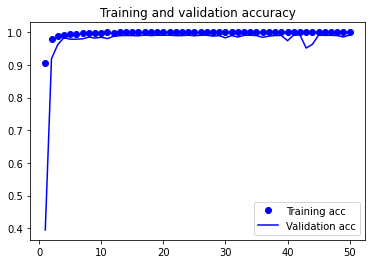

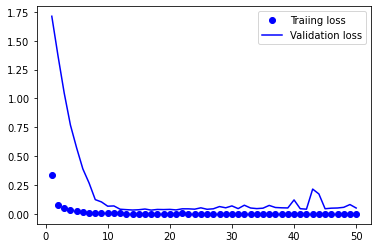

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Traiing loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

Shape of labels: (8400, 1)
Shape of wrong_cnn_pred: (73, 1) 

Shape of join: (73, 2) 



<AxesSubplot:xlabel='Value', ylabel='count'>

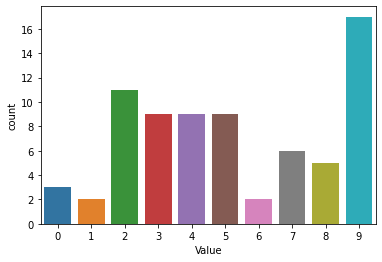

In [ ]:
# Let's look at the predictions from our CNN model
cnn_pred = pd.DataFrame(np.argmax(cnn_model.predict(x_val), axis=1), columns=["CNN Prediction"])

# Correct labels from input dataset
labels = pd.DataFrame(np.argmax(y_val, axis = 1), columns=["Value"])
print('Shape of labels:', labels.shape)

# Let's see where our model was wrong
wrong_cnn_pred = cnn_pred[cnn_pred["CNN Prediction"] != labels['Value']]
print('Shape of wrong_cnn_pred:', wrong_cnn_pred.shape, "\n")

join = pd.concat([wrong_cnn_pred, labels], axis=1, join="inner")
print('Shape of join:', join.shape, "\n")

sns.countplot(x=join["Value"])

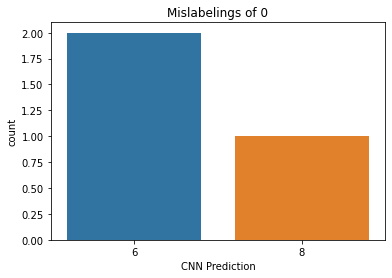

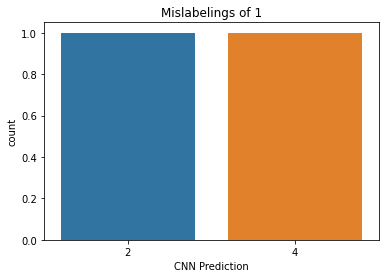

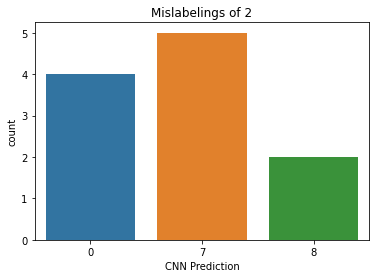

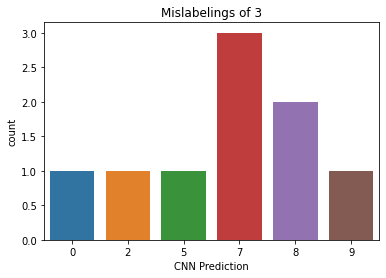

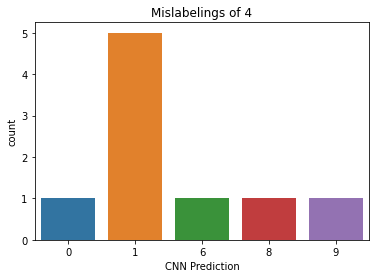

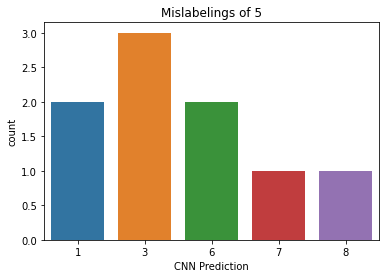

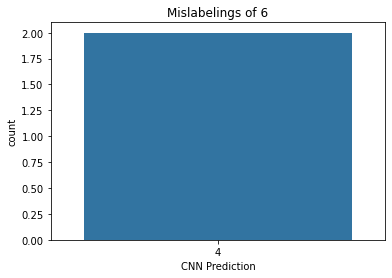

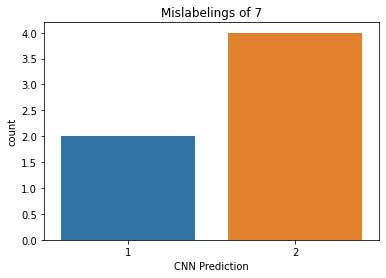

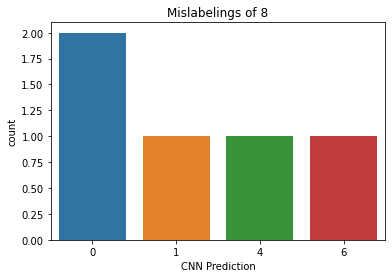

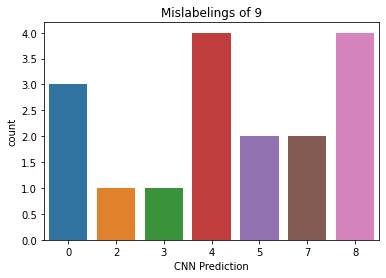

In [ ]:
# Loop on all categories (labels)
for i in range(0, num_category):
    # Filter the join table on the current category
    filtered = join[join["Value"] == i]
    plt.figure()
    sns.countplot(x=filtered["CNN Prediction"]).set(title="Mislabelings of {}".format(i))

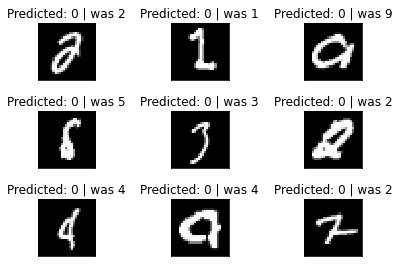

In [ ]:
fig = plt.figure()
j = 0
num_plots = min(9, wrong_cnn_pred.shape[0])
for i in wrong_cnn_pred.index[:num_plots]:
    plt.subplot(3,3,j+1)
    plt.tight_layout()
    digit = x_val[i].reshape((28,28))
    pred_label = wrong_cnn_pred.loc[i].argmax() # we get the index of the max in the row i
    correct_label = y_val[i].argmax()
    plt.title("Predicted: {} | was {}".format(pred_label, correct_label)) 
    plt.imshow(digit, cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    j += 1

In [ ]:
# scikit-learn expects 2d num arrays for the training dataset for a fit function.
# Thefore we need to reshape our arrays
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1]*x_val.shape[2])

In [ ]:
y_train = np.argmax(y_train, axis=1)
print(y_train.shape)
y_val = np.argmax(y_val, axis=1)
print(y_val.shape)

(33600,)
(8400,)


### Build and train RF Classifier model

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

# Predictions for validation
rf_pred = rf.predict(x_val)
print(rf_pred.shape)

(8400,)


In [ ]:
# Validation data metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= y_val, y_pred= rf_pred))

Test data metrics:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       813
           1       0.99      0.99      0.99       961
           2       0.96      0.97      0.97       860
           3       0.96      0.95      0.95       863
           4       0.96      0.96      0.96       827
           5       0.96      0.97      0.96       756
           6       0.97      0.98      0.98       841
           7       0.97      0.96      0.97       899
           8       0.95      0.95      0.95       768
           9       0.96      0.94      0.95       812

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [ ]:
print ("Confusion Report")
print(sklearn.metrics.confusion_matrix(y_val, rf_pred))

Confusion Report
[[793   0   1   2   2   2   6   0   7   0]
 [  0 947   5   3   1   1   1   1   2   0]
 [  3   0 837   4   4   0   3   4   5   0]
 [  0   0  11 820   0  11   1   7   9   4]
 [  1   2   0   0 796   0   5   2   4  17]
 [  2   0   0  10   0 734   6   1   3   0]
 [  3   0   0   0   2   7 828   0   1   0]
 [  1   3  13   1   6   0   0 865   0  10]
 [  3   3   3   8   3   8   5   1 731   3]
 [  7   1   2  10  11   3   0  10   5 763]]


SVM


In [ ]:
svc = LinearSVC(dual=False)
svc.fit(x_train, y_train)

# Predictions for validation
svc_pred = svc.predict(x_val)
print(svc_pred.shape)

(8400,)


In [ ]:
# Validation data metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= y_val, y_pred= svc_pred))

Test data metrics:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       813
           1       0.96      0.98      0.97       961
           2       0.91      0.88      0.90       860
           3       0.90      0.87      0.89       863
           4       0.91      0.91      0.91       827
           5       0.85      0.87      0.86       756
           6       0.94      0.96      0.95       841
           7       0.93      0.93      0.93       899
           8       0.86      0.86      0.86       768
           9       0.88      0.87      0.88       812

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



In [ ]:
print ("Confusion Report")
print(sklearn.metrics.confusion_matrix(y_val, svc_pred))

Confusion Report
[[776   0   3   2   2   7  14   0   6   3]
 [  0 937   8   3   1   3   2   0   7   0]
 [  5   8 761  18  12   5   9  15  26   1]
 [  3   2  27 755   2  36   3   8  15  12]
 [  2   9   8   1 755   3   4   0   8  37]
 [  8   3   3  31   5 658  11   3  27   7]
 [  3   0   8   0   7  12 806   0   5   0]
 [  3   5  14   3  11   3   1 832   3  24]
 [  4   9   5  19  10  33   9   2 664  13]
 [  9   3   3  11  24  10   0  32  10 710]]


In [ ]:
rf_pred = pd.DataFrame(rf_pred, columns=["RF Prediction"])
svc_pred = pd.DataFrame(svc_pred, columns=["SVC Prediction"])
all_pred = pd.concat([cnn_pred, rf_pred, svc_pred, labels], axis=1)
all_pred.head()

,CNN Prediction,RF Prediction,SVC Prediction,Value
0,3,3,3,3
1,6,6,6,6
2,9,9,9,9
3,5,5,5,5
4,6,6,6,6


In [ ]:
# CNN has the best accuracy until now
# Let's see if we can improve it by using the RF and SVC models
# We don't want to give to much weight to RF and SVC because they would otherwise decrease the whole accuracy
# Therefore let's focus on the errors of CNN model and look at the prediction of RF and SVC
pred_dict = dict()

pred_dict["all wrong"] = len(all_pred[(all_pred["CNN Prediction"] != all_pred["Value"]) & 
                                      (all_pred["RF Prediction"] != all_pred["Value"]) &
                                      (all_pred["SVC Prediction"] != all_pred["Value"])].index)

pred_dict["only CNN correct"] = len(all_pred[(all_pred["CNN Prediction"] == all_pred["Value"]) & 
                                      (all_pred["RF Prediction"] != all_pred["Value"]) &
                                      (all_pred["SVC Prediction"] != all_pred["Value"])].index)

pred_dict["only CNN correct_RF and SVC wrong with same value"] = len(all_pred[(all_pred["CNN Prediction"] == all_pred["Value"]) & 
                                      (all_pred["RF Prediction"] != all_pred["Value"]) &
                                      (all_pred["SVC Prediction"] != all_pred["Value"]) &
                                      (all_pred["SVC Prediction"] == all_pred["RF Prediction"])].index)

pred_dict["only RF correct"] = len(all_pred[(all_pred["CNN Prediction"] != all_pred["Value"]) & 
                                      (all_pred["RF Prediction"] == all_pred["Value"]) &
                                      (all_pred["SVC Prediction"] != all_pred["Value"])].index)

pred_dict["only SVC correct"] = len(all_pred[(all_pred["CNN Prediction"] != all_pred["Value"]) & 
                                      (all_pred["RF Prediction"] != all_pred["Value"]) &
                                      (all_pred["SVC Prediction"] == all_pred["Value"])].index)

pred_dict["RF SCV correct_CNN wrong"] = len(all_pred[(all_pred["CNN Prediction"] != all_pred["Value"]) & 
                                      (all_pred["RF Prediction"] == all_pred["Value"]) &
                                      (all_pred["SVC Prediction"] == all_pred["Value"])].index)

print(pred_dict)  

{'all wrong': 51, 'only CNN correct': 178, 'only CNN correct_RF and SVC wrong with same value': 126, 'only RF correct': 10, 'only SVC correct': 4, 'RF SCV correct_CNN wrong': 8}


In [ ]:
final_pred = cnn_model.predict(x_test)
final_pred.shape

(28000, 10)

In [ ]:
y_pred = final_pred.argmax(axis=1)
ImageID = np.arange(len(y_pred))+1
Out = pd.DataFrame([ImageID,y_pred]).T
Out.rename(columns = {0:'ImageId', 1:'Label'})
#Out
Out.to_csv('submission.csv', header =  ['ImageId', 'Label' ], index = None)